# Metacells Seurat Analysis Vignette

This vignette demonstrates a possible [Seurat](https://satijalab.org/seurat/index.html) analysis of the metacells generated from the basic [metacells vignette](Metacells_Vignette.html). The latest version of this vignette is available in [Github](https://github.com/tanaylab/metacells/blob/master/sphinx/Seurat_Analysis.rst).

## Preparation

You should first run the basic metacells vignette to obtain the file `metacells.h5ad`. Next, we will require the R libraries we will be using. Note that installation of [SeuratData](https://github.com/satijalab/seurat-data) and [SeuratDisk](https://github.com/mojaveazure/seurat-disk) is non-standard.

In [1]:
library(dplyr)
library(Seurat)
library(SeuratData)
library(SeuratDisk)
options(jupyter.plot_mimetypes = 'image/svg+xml')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message i

## Getting the raw data

We will use the data generated by the metacells vignette, the `metacells.h5ad` file generated by it. We'll need to convert it to Seurat's format and load it as such. For some reason, the Seurat importer chokes on the `__name__` property so until this [bug](https://github.com/mojaveazure/seurat-disk/issues/82) is fixed, we'll convert the `for_seurat.h5ad` file we created just for this purpose, without this property:

In [2]:
Convert(source="for_seurat.h5ad", assay="RNA", dest="h5seurat", overwrite=TRUE, verbose=FALSE)
mdata <- LoadH5Seurat("for_seurat.h5seurat", verbose=FALSE)
mdata

Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Validating h5Seurat file

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
22617 features across 1546 samples within 1 assay 
Active assay: RNA (22617 features, 0 variable features)

## Analysis

Full analysis of the data using Seurat is outside the scope of this vignette; see the Seurat [documentation](https://satijalab.org/seurat/index.html). That said, we'll just do some simple PCA analysis based on the Seurat [tutorial](https://satijalab.org/seurat/articles/weighted_nearest_neighbor_analysis.html).

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


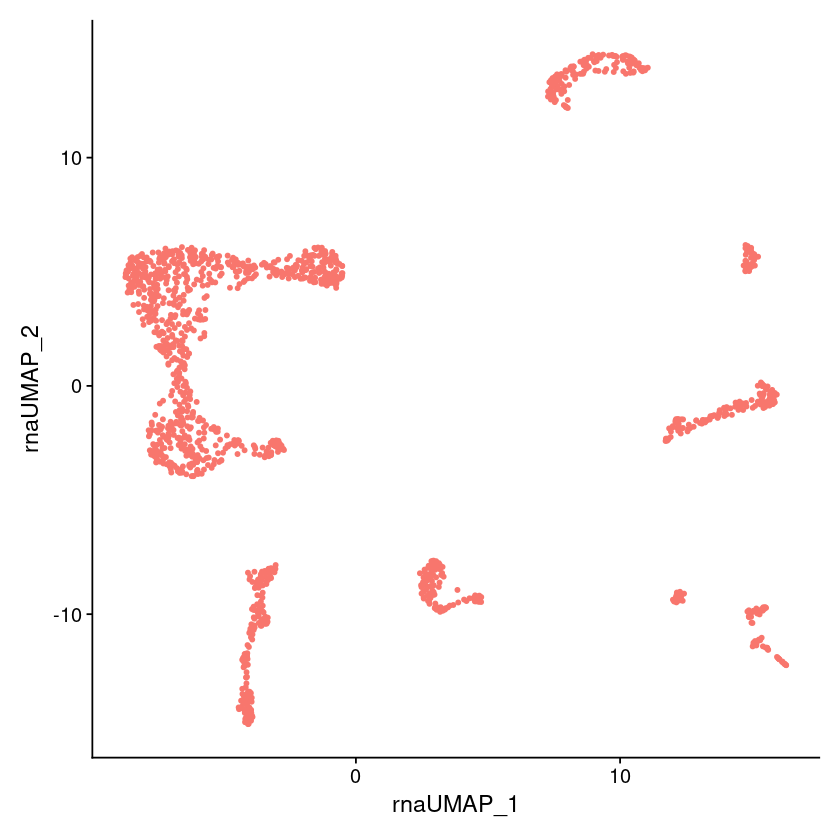

In [3]:
pca <- NormalizeData(mdata) %>% FindVariableFeatures(verbose=FALSE) %>% ScaleData(verbose=FALSE) %>% RunPCA(verbose=FALSE)
pca <- RunUMAP(pca, reduction = 'pca', dims = 1:30, assay = 'RNA', 
               reduction.name = 'rna.umap', reduction.key = 'rnaUMAP_', verbose=FALSE)
DimPlot(pca, reduction = 'rna.umap') + NoLegend()